In [ ]:
%matplotlib notebook

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
bike_trip_df = pd.read_csv("../Resources/trip.csv")
bike_trip_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [19]:
#group by gender
bike_gender_group = bike_trip_df.groupby("gender")
gender_trips = bike_gender_group['tripduration'].count()
#gender_trips = gender_trips.drop(gender_trips.index[3])
gender_trips = gender_trips.drop('stoptime')


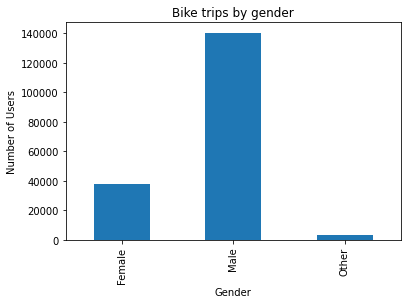

In [25]:
gender_chart = gender_trips.plot(kind="bar", title="Bike trips by gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Users")
plt.show()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [28]:
bike_groups = bike_trip_df.groupby(['bikeid','gender'])

In [30]:
bikes_group = bike_groups.sum()
one_bike_df = bikes_group.loc['SEA00001']
one_bike_df

,tripduration
gender,
Female,15876.665
Male,41150.373
Other,276.880


Text(0, 0.5, 'Trip Duration')

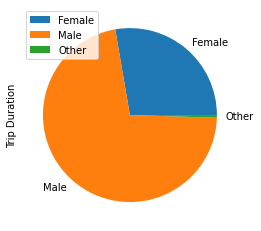

In [32]:
bike_plot = one_bike_df.plot(kind="pie", y='tripduration')
bike_plot.set_ylabel("Trip Duration")